# California Housing

- Number of Instances: 20640

- Number of Attributes: 8 numeric, predictive attributes and the target

- Attribute Information:
  - MedInc        median income in block group
  - HouseAge      median house age in block group
  - AveRooms      average number of rooms per household
  - AveBedrms     average number of bedrooms per household
  - Population    block group population
  - AveOccup      average number of household members
  - Latitude      block group latitude
  - Longitude     block group longitude
  
- Missing Attribute Values: None

## Setps going forward

1. Collect data
2. Normilize, get all data to same scale
3. Chose validation method, here hold-out validation
4. Chose activation function, here linear
5. Chose model selection, here multilayer perceptron

In [1]:
# Imports
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# View some of the data
housing_data = fetch_california_housing(as_frame=True)
print('Input features:\n',housing_data.data.head())
print('Target feature:\n',housing_data.target.head())

x = housing_data.data
y = housing_data.target

# Normalize the input features (attributes)
scalar = MinMaxScaler()
xn = scalar.fit_transform(x)
print('minmax scalar:\n', xn)   # MinMaxScaler is applied column-wise (normalize each column)

# Split data into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(xn, y, test_size=0.2, random_state=42)
print(len(xtrain))

print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

Input features:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Target feature:
 0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64
minmax scalar:
 [[0.53966842 0.78431373 0.0435123  ... 0.00149943 0.5674814  0.21115538]
 [0.53802706 0.39215686 0.03822395 ... 0.00114074 0.565356   0.21215139]
 [0.46602805 1.         0.05275646 ... 0.00169796 0.5642933  0.21015936]
 ...
 [0.08276438 0.31372549 0.03090386 ... 0.0013144  0.73219979 0.31175299]
 [0.09429525 0.33

In [3]:
# Building the multilayer perceptron
from tensorflow import keras
from keras import layers
from keras.models import Sequential

model = Sequential([
    # First hidden layer
    layers.Dense(64, activation='relu', input_shape=[8]), # activation: sigmoid or relu, look up the difference
    # Second hidden layer
    layers.Dense(32, activation='relu'),
    # Third hidden layer
    layers.Dense(16, activation='relu'),
    # Output layer
    layers.Dense(1)   #  By default, activation function is set to None. That means that by default it is a linear activation.
])

model.compile(optimizer='adam', loss='mse', metrics=['mse','mae','accuracy']) # Optimizer: rmsprop


Using TensorFlow backend.
2022-09-27 12:26:07.714788: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-27 12:26:07.715452: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [5]:
import tensorflow as tf
# visualize your model
model.summary()

#dot_img_file = '/tmp/model_1.png'
#tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


In [6]:
# train your model
history = model.fit(xtrain, ytrain, epochs=300, validation_split=0.2, batch_size=1024, verbose=1)

Train on 13209 samples, validate on 3303 samples
Epoch 1/300
13209/13209 [==============================] - 1s 102us/step - loss: 5.5319 - mse: 5.5319 - mae: 2.0505 - accuracy: 0.0000e+00 - val_loss: 5.2798 - val_mse: 5.2798 - val_mae: 1.9791 - val_accuracy: 0.0000e+00
Epoch 2/300
13209/13209 [==============================] - 0s 7us/step - loss: 4.9848 - mse: 4.9848 - mae: 1.9119 - accuracy: 0.0000e+00 - val_loss: 4.7389 - val_mse: 4.7389 - val_mae: 1.8374 - val_accuracy: 0.0000e+00
Epoch 3/300
13209/13209 [==============================] - 0s 6us/step - loss: 4.2897 - mse: 4.2897 - mae: 1.7194 - accuracy: 1.5141e-04 - val_loss: 3.7951 - val_mse: 3.7951 - val_mae: 1.5636 - val_accuracy: 0.0015
Epoch 4/300
13209/13209 [==============================] - 0s 6us/step - loss: 3.1063 - mse: 3.1063 - mae: 1.3572 - accuracy: 0.0031 - val_loss: 2.3695 - val_mse: 2.3695 - val_mae: 1.1244 - val_accuracy: 0.0024
Epoch 5/300
13209/13209 [==============================] - 0s 7us/step - loss: 1.7670

In [7]:
loss, mae, mse, acc = model.evaluate(xtest, ytest, verbose=1)
print('loss:', loss, mse, mae)
print('accuracy:', acc)

4128/4128 [==============================] - 0s 36us/step
loss: 0.3526086864429851 0.40225765109062195 0.35260865092277527
accuracy: 0.00484496122226119


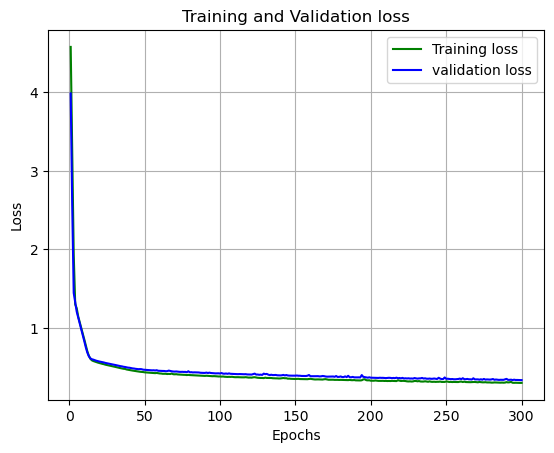

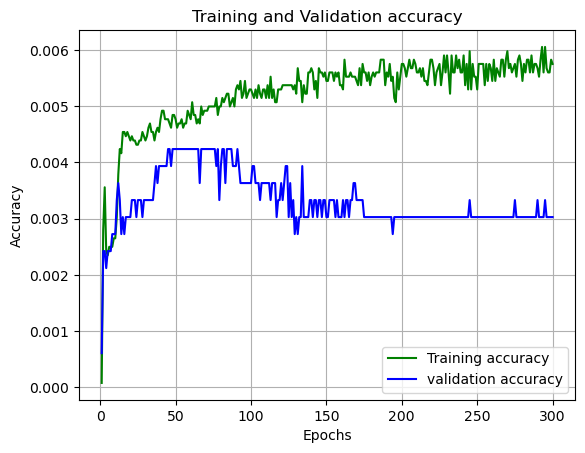

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,301)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,301)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()